# <p style="color:blue;text-align:center;font-size:32px"> Convolutional Neural Network (CNN)</p>

<p style="text-align: justify;text-justify: inter-word;">Evrişimli Sinir Ağları (CNN), resim tanıma ve sınıflandırma gibi alanlarda çok etkili olduğu kanıtlanmış olan sinir ağları kategorisidir. CNN'ler, robotlarda ve kendi kendine sürülen otomobillerde görme yeteneği sağlamanın yanı sıra; yüzleri,nesneleri ve trafik işaretlerini belirlemede de başarılı olmuştur. Bu nedenle, günümüzde makine öğrenimi ile ilgilenenlerin çoğu için önemlidir. CNN temelde 4 kısımdan oluşur:</p>
<br>
<p style="color:blue">
1- Convolution<br>
2- Non-Linear Activation Function (ReLU)<br>
3- Pooling<br>
4- Fully Connected Layer<br>
</p>

## Fei-Fei Li: Resimleri Anlamaları için Bilgisayarları Nasıl Eğitiyoruz ?

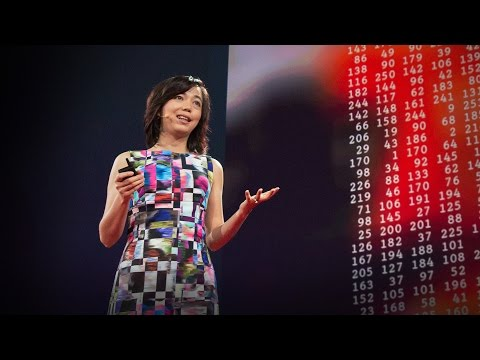

In [31]:
from IPython.display import YouTubeVideo,Image,HTML
YouTubeVideo('40riCqvRoMs',height=300,width=500)

## <p style="color:purple">1. Adım: Convolution</p>

Standart bir resim, Kırmızı (R), Yeşil (G) ve Mavi (B) olmak üzere üç katmandan oluşur. Her bir katman,  0-255 aralığında piksel değerlerine sahiptir.Bu üç katman8, birbiri üzerine yığılmış 3 tane 2 boyutlu matris olarak düşünebilirsiniz.<br><br>


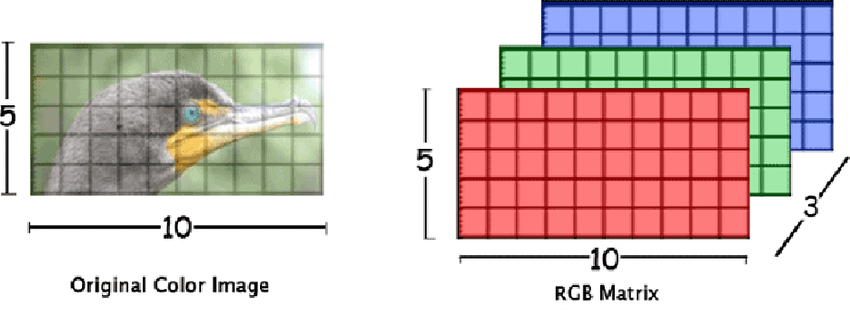

In [22]:
Image(filename="./rgb.png")

CNN'nin birincil amacı verilen resmin özellikleri çıkarmaktır. Girdi verisinin görüntü özelliklerini öğrenerek pikseller arasındaki mekansal ilişkiyi korur.

### Filtreleme ( Filter, Kernel )
* Düzeltme, keskinleştirme ve kenarları belirgin hale getirmek için kullanılır.
* Resmin belirli özellikleri üzerinde vurgulama yapılır. Ya da gereksiz özellikleri kaldırmak için görüntü filtrelenir.<br><br>

In [33]:
Image(filename="./input.png")
HTML('<img src="./conv_animation.gif">')

<p style="text-align: justify;text-justify: inter-word;">Input Image' a filtre uygulama işlemi yukarıda gösterilmiştir. Girdi resmi üzerine filtre uygulandıktan sonra, filtre 1 piksel kaydırılır.Filtrenin uygulandığı kısımdaki girdi matris'i ile filtre matrisinde aynı indeksteki elemanların çarpımı bulunur ve Convolved matris'i oluşturulur. </p>

<p style="text-align: justify;text-justify: inter-word;">Aşağıda farklı filtrelerin resme etkilerini görebiliriz. Kenar algılama, keskinleştirme ve bulanıklaştırma gibi işlemleri, yalnızca CONVOLUTION işleminden önce filtre matrisimizin sayısal değerlerini değiştirerek gerçekleştirebiliriz . Böylece farklı filtreler bir görüntüden kenarlar, eğriler gibi farklı özellikleri çıkarmamızı sağlar.</p>

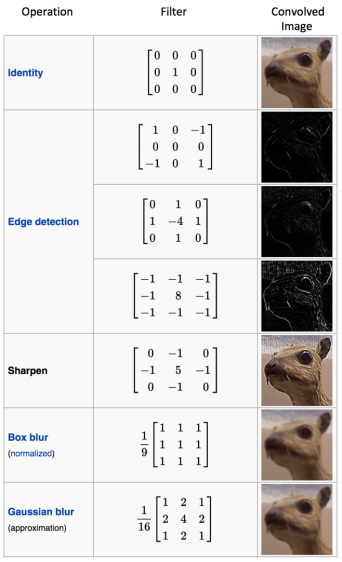

<p style="text-align: justify;text-justify: inter-word;">CNN, eğitim süreci sırasında bu filtrelerin değerlerini kendisi öğrenir. Fakat eğitim sürecinden önce filtre sayısı, filtre boyutu vb. parametreleri belirtmemiz gerekir. Filtre sayısını artırdıkça, daha fazla görüntü özelliği ayıklanır.Böylece oluşturduğumuz ağ içerinsde, görünmeyen kalıpları tanımada daha iyi olur.</p>

## <p style="color:purple">2. Adım: Non-Linear Activation Function (ReLU)</p>

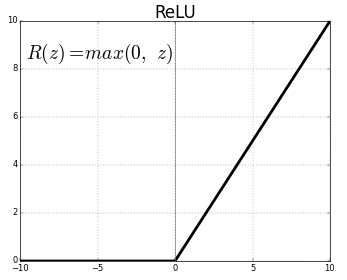

<p style="text-align: justify;text-justify: inter-word;">ReLU özellik haritasındaki (Feature Map) tüm negatif piksel değerlerini sıfır ile değiştirir. ReLU'nun amacı, CNN'imize non-linearity'i (doğrusal olmayan) tanıtmaktı.Çünkü gerçek dünyadaki verilerin çoğu non-linear'dır. Aşağıdaki resim ReLU fonksiyonun, resme uygulandıktan önceki ve sonraki halini net bir şekilde göstermektedir.</p>


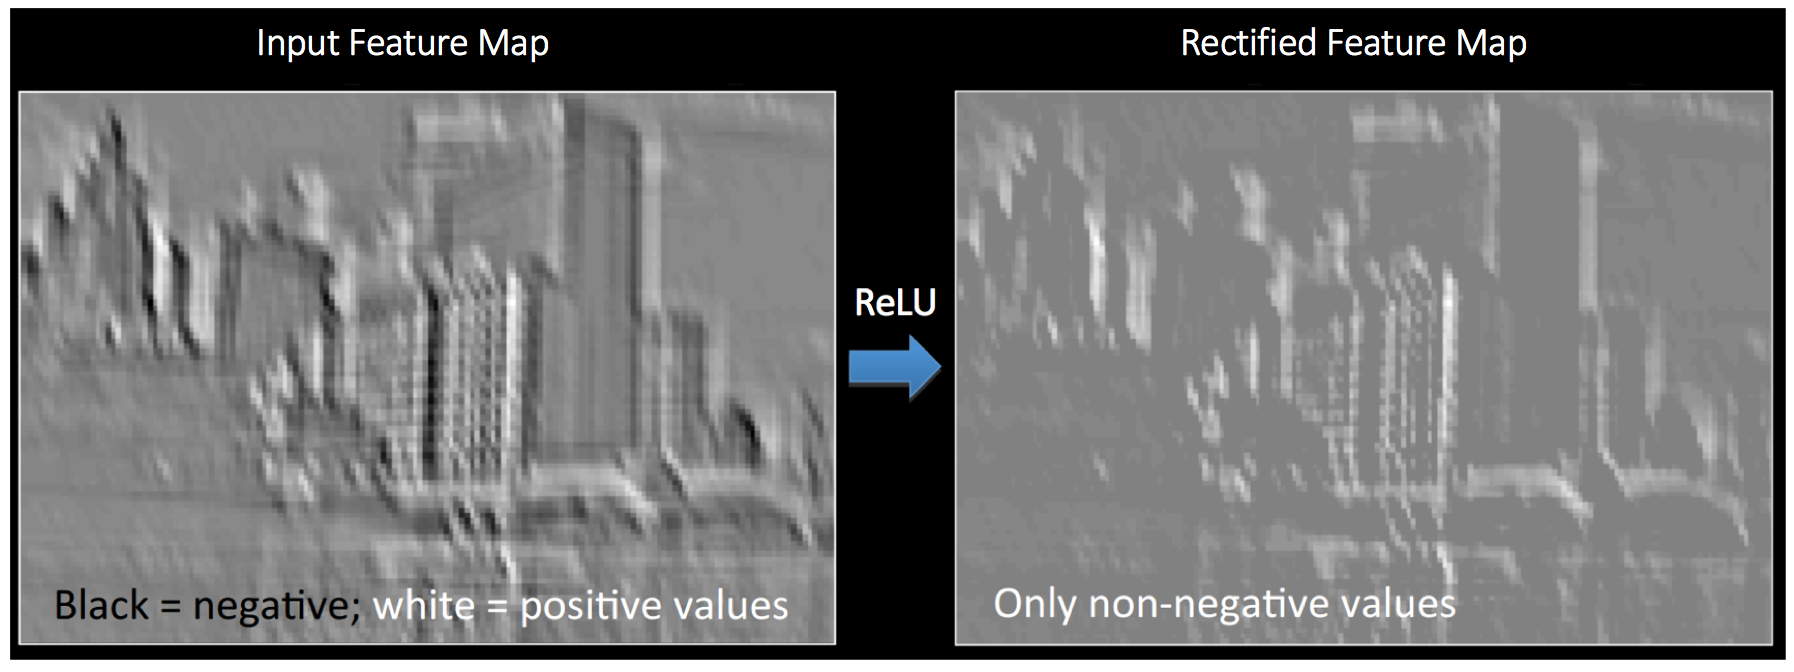

## <p style="color:purple">3. Adım: Pooling </p>

<p style="text-align: justify;text-justify: inter-word;">Pooling katmanları işlem yükünü,hafıza kullanımı, ve parametrelerinin sayısını azaltmak için kullanılır. Böylece girdinin en önemli özellikleri saklanmış olur. 3 tipi vardır: Max, Average, Sum.<br><br>

Max Pooling durumunda, 2 × 2'lik özellik seçici tanımlar ve o penceredeki rectified özellik haritasından en büyük elemanı alırız. En büyük öğeyi almak yerine, o penceredeki ortalama öğeleri  veya tüm öğelerin toplamını alabiliriz. Uygulamalar sonucunda, Max Pooling'in daha iyi çalıştığı gözlemlenmiştir. Eğer 2 x 2 Pooling uygularsak, özellik haritası %75 azalmış olur.
<br><br>
Aşağıda Max Pooling uygulanmış Rectified Feature Map' in son hali en sağ tarafta gösterilmistir. Figür' den de anlaşılacağı üzere, özellik haritasına 2 x 2 lik bir pencere üzerinde Max Pooling uygulanmış ve penceredeki en büyük değerler seçilmiştir.</p>



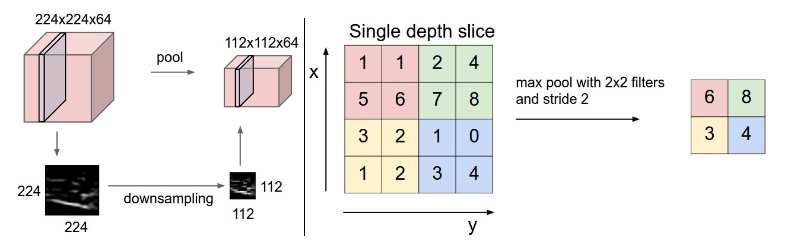

** <p style="text-align: center;text-justify: inter-word;">Aşağıdaki resimde Rectified Feature Map'i çıkarılmış bir girdinin, Max Pooling uygulandıktan sonraki hali gösterilmiştir.</p>** 

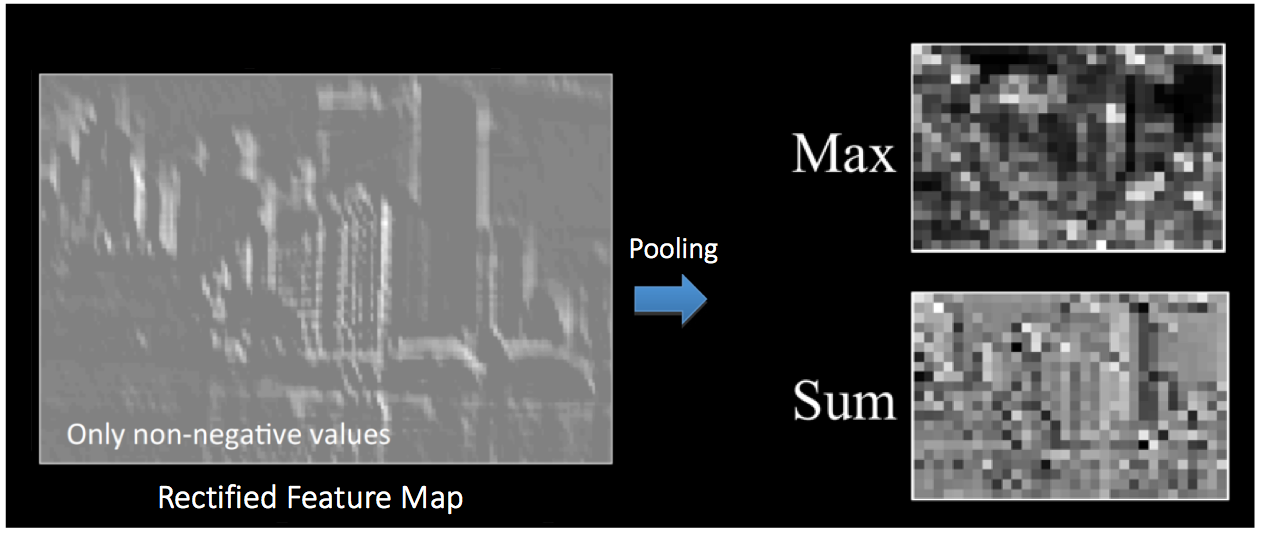

** Pooling ile;**
* Özellik boyutu daha küçük ve daha yönetilebilir hale gelir.
* Ağdaki parametrelerin ve hesaplamaların sayısını azaltır.Böylece  aşırı uygunluğu(overfitting) kontrol eder.


## <p style="color:purple">4. Adım: Fully Connected Layer </p>

Convolution ve Pooling katmanlarının çıktıları, girdinin üst düzey özelliklerini temsil eder. Fully Connceted Layer(tam bağlı katmanlar), bu özellikleri girdi resmini çeşitli sınıflara ayırmak için kullanmaktır. Örneğin, aşağıdaki resim 2 olası çıktıya sahiptir.<br> 
**Not:** 2 çıktıya sahip sınıflandırma işlemlerinde output layer'a Sigmoid fonksiyonu uygulanır. Eğer çıktı sayısı 2'den fazla ise Softmax uygulanır ve çıkış olasılıklarının toplamı 1'dir.<br><br> 
[Sigmoid mi Softmax mı ?](https://stats.stackexchange.com/questions/233658/softmax-vs-sigmoid-function-in-logistic-classifier)
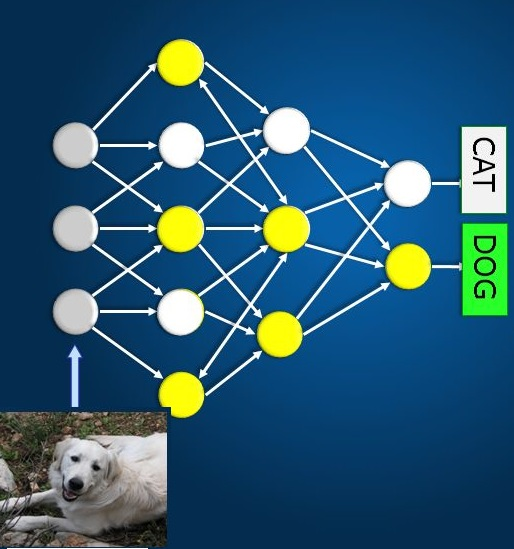

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten

Using TensorFlow backend.


In [3]:
#CNN'i baslatma
classifier = Sequential()